In [3]:
%matplotlib inline

from numpy import *
from numpy.random import randint as rand
import matplotlib.pyplot as plt

from IPython.display import clear_output
from time import sleep

In [4]:
# Maze generation algorithm from wikipedia

def maze(width=81, height=51, complexity=.75, density=.75):
    # Only odd shapes
    shape = ((height // 2) * 2 + 1, (width // 2) * 2 + 1)
    # Adjust complexity and density relative to maze size
    complexity = int(complexity * (5 * (shape[0] + shape[1]))) # number of components
    density    = int(density * ((shape[0] // 2) * (shape[1] // 2))) # size of components
    # Build actual maze
    Z = zeros(shape, dtype=bool)
    # Fill borders
    Z[0, :] = Z[-1, :] = 1
    Z[:, 0] = Z[:, -1] = 1
    # Make aisles
    for i in range(density):
        x, y = rand(0, shape[1] // 2) * 2, rand(0, shape[0] // 2) * 2 # pick a random position
        Z[y, x] = 1
        for j in range(complexity):
            neighbours = []
            if x > 1:             neighbours.append((y, x - 2))
            if x < shape[1] - 2:  neighbours.append((y, x + 2))
            if y > 1:             neighbours.append((y - 2, x))
            if y < shape[0] - 2:  neighbours.append((y + 2, x))
            if len(neighbours):
                y_,x_ = neighbours[rand(0, len(neighbours) - 1)]
                if Z[y_, x_] == 0:
                    Z[y_, x_] = 1
                    Z[y_ + (y - y_) // 2, x_ + (x - x_) // 2] = 1
                    x, y = x_, y_
    return Z


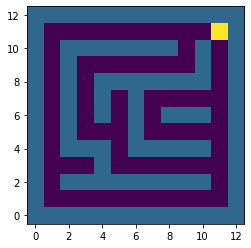

In [5]:
# make a maze, convert array from True/False to integer:
world=array(maze(width=12,height=12),dtype='int')
# 'animate' 
for j in range(12):
    picture=copy(world) # copy the array (!)
    picture[j,j]=3
    plt.imshow(picture,origin='lower')
    plt.show()
    sleep(0.01)
    clear_output(wait=True)

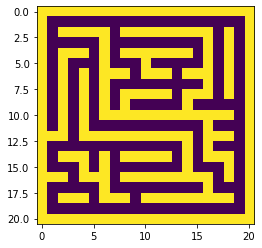

In [8]:
#plt.imshow(maze(width=20, height=20))

In [ ]:
import numpy as np
import scipy as scp
import pandas as pd

class agent(self):
    
    def __init__(self):
        
        self.q_functions[direction_i][state_pos] = 0.
        self.position
        
    def predict_action(self, random_p):
        """predict action based on position"""
        """sample p and do random walk or walk based on q function"""
        
    
        return action_indices
    
    def update_q(self):
        q_new = q_old + alpha*(reward + gamma* max(q_old) - q_old)
    
    def update_position(self, action_indices):
    
class maze_env(self):
    
    def __init__(self):
    
        self.maze
        self.target
        
    def gen_maze(self):
        
    
    def give_reward(self, position):
    
    
    def reset_agent(self,agent):
        
    
    def set_target(self, position):
        
    
    def get_possible_actions(self, position):
        
    

In [ ]:
initialize q functions

initialize maze

initialize init position and target

parameter alpha



